In [ ]:
# import the required module / sub-module 

In [2]:
import numpy as np # for handling missing data
import pandas as pd # for data manipulation and cleaning
import matplotlib.pyplot as plt # for plotting data records
import seaborn as sns # for advanced visualization

In [ ]:
# Step 1: Load and Explore the Dataset 

In [5]:
# Load the dataset
df = pd.read_csv(r"C:\Users\yashr\Downloads\india_crime_data_5000_inconsistent.csv")


In [6]:
# View first few rows
df.head()

,Crime_ID,Crime_Type,City,Date_of_Occurrence,Time_of_Occurrence,Severity_Level,Latitude,Longitude,Reporting_Channel,Weather_Condition,Day_of_Week,Number_of_Witnesses,Injuries_Report,Arrests_Made,Suspect_Identified,Response_Time (minutes),Offender_Age_Group,Temperature (°C),Festival/Season,Victim_Occupation
0,a6c7b480-509e-4325-9aad-6b51cfa92ed9,Burglary,Kolkata,2023-12-31,20:27:11,High,36.506183,87.691877,Anonymous Tip,Cloudy,Friday,10,Yes,Yes,No,18,Juvenile,16.0,Holi,Teacher
1,1da5fd94-c182-4881-9cff-b32f0f3e29c5,Cybercrime,Lucknow,2024-12-06,20:01:51,Medium,25.078044,82.616198,Helpline,Stormy,Friday,5,No,Yes,Yes,5,26-40,35.0,Christmas,Student
2,46ff2bd0-9582-4eea-a528-d82187743021,Vandalism,Lucknow,2020-04-28,19:07:04,Low,11.338849,84.648488,Online,Clear,Wednesday,4,Yes,No,No,18,26-40,23.0,Pongal,Business
3,c21d01c7-3078-41b3-8f55-4917aeb9b497,Assault,Chennai,2020-07-05,02:51:14,Medium,17.734397,84.117286,Helpline,Cloudy,Sunday,0,No,No,No,27,Juvenile,31.0,Eid,Others
4,3f3a2631-d448-4c2a-a7c1-213d373f7ceb,Cybercrime,Jaipur,2020-07-23,20:54:48,High,36.045546,82.041492,Online,Stormy,Tuesday,10,Yes,No,Yes,18,26-40,16.0,Navratri,Others


In [8]:
# Check structure 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010 entries, 0 to 5009
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Crime_ID                 5010 non-null   object 
 1   Crime_Type               5010 non-null   object 
 2   City                     5010 non-null   object 
 3   Date_of_Occurrence       5010 non-null   object 
 4   Time_of_Occurrence       5010 non-null   object 
 5   Severity_Level           5010 non-null   object 
 6   Latitude                 5010 non-null   float64
 7   Longitude                5010 non-null   float64
 8   Reporting_Channel        5010 non-null   object 
 9   Weather_Condition        5010 non-null   object 
 10  Day_of_Week              5010 non-null   object 
 11  Number_of_Witnesses      5010 non-null   int64  
 12  Injuries_Report          5010 non-null   object 
 13  Arrests_Made             5010 non-null   object 
 14  Suspect_Identified      

In [21]:
# find the missing value
df.isnull().sum()

Crime_ID                     0
Crime_Type                   0
City                         0
Date_of_Occurrence           0
Time_of_Occurrence           0
Severity_Level               0
Latitude                     0
Longitude                    0
Reporting_Channel            0
Weather_Condition            0
Day_of_Week                  0
Number_of_Witnesses          0
Injuries_Report              0
Arrests_Made                 0
Suspect_Identified           0
Response_Time (minutes)      0
Offender_Age_Group           0
Temperature (°C)             0
Festival/Season            677
Victim_Occupation            0
dtype: int64

In [ ]:
# Step 2: Handle Missing and Duplicate Data

In [13]:
# Remove duplicate rows
df = df.drop_duplicates()
df

,Crime_ID,Crime_Type,City,Date_of_Occurrence,Time_of_Occurrence,Severity_Level,Latitude,Longitude,Reporting_Channel,Weather_Condition,Day_of_Week,Number_of_Witnesses,Injuries_Report,Arrests_Made,Suspect_Identified,Response_Time (minutes),Offender_Age_Group,Temperature (°C),Festival/Season,Victim_Occupation
0,a6c7b480-509e-4325-9aad-6b51cfa92ed9,Burglary,Kolkata,2023-12-31,20:27:11,High,36.506183,87.691877,Anonymous Tip,Cloudy,Friday,10,Yes,Yes,No,18,Juvenile,16.0,Holi,Teacher
1,1da5fd94-c182-4881-9cff-b32f0f3e29c5,Cybercrime,Lucknow,2024-12-06,20:01:51,Medium,25.078044,82.616198,Helpline,Stormy,Friday,5,No,Yes,Yes,5,26-40,35.0,Christmas,Student
2,46ff2bd0-9582-4eea-a528-d82187743021,Vandalism,Lucknow,2020-04-28,19:07:04,Low,11.338849,84.648488,Online,Clear,Wednesday,4,Yes,No,No,18,26-40,23.0,Pongal,Business
3,c21d01c7-3078-41b3-8f55-4917aeb9b497,Assault,Chennai,2020-07-05,02:51:14,Medium,17.734397,84.117286,Helpline,Cloudy,Sunday,0,No,No,No,27,Juvenile,31.0,Eid,Others
4,3f3a2631-d448-4c2a-a7c1-213d373f7ceb,Cybercrime,Jaipur,2020-07-23,20:54:48,High,36.045546,82.041492,Online,Stormy,Tuesday,10,Yes,No,Yes,18,26-40,16.0,Navratri,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,c44b625a-2669-44b7-ac80-59fbbb0b93ba,Domestic Violence,Mumbai,2020-12-12,19:16:04,Medium,14.227930,72.840169,Online,Clear,Tuesday,8,No,No,Yes,20,18-25,44.0,Eid,Others
4996,86d3fe53-6e2c-4ada-8267-ff008c01141b,Burglary,Delhi,2020-09-26,12:26:14,High,18.935197,91.027484,Police Station,Cloudy,Monday,6,Yes,Yes,Yes,15,Juvenile,25.0,Diwali,Teacher
4997,971117c6-570d-42d9-a426-3d5de18109e1,Burglary,Lucknow,2024-09-19,01:37:48,Medium,26.859466,72.484382,Police Station,Stormy,Monday,2,Yes,No,Yes,32,26-40,25.0,Eid,Student
4998,f2cf7a5c-316c-49de-86af-ebcb8b3e8806,Cybercrime,Mumbai,2023-07-26,18:24:56,High,35.059279,68.132817,Anonymous Tip,Clear,Friday,9,Yes,Yes,Yes,11,18-25,43.0,Diwali,Unemployed


In [17]:
# Handle missing values

In [18]:
df['Victim_Occupation'] = df['Victim_Occupation'].fillna("Unknown")

In [19]:
df['Temperature (°C)'] = df['Temperature (°C)'].fillna(df['Temperature (°C)'].mean())


In [20]:
df

,Crime_ID,Crime_Type,City,Date_of_Occurrence,Time_of_Occurrence,Severity_Level,Latitude,Longitude,Reporting_Channel,Weather_Condition,Day_of_Week,Number_of_Witnesses,Injuries_Report,Arrests_Made,Suspect_Identified,Response_Time (minutes),Offender_Age_Group,Temperature (°C),Festival/Season,Victim_Occupation
0,a6c7b480-509e-4325-9aad-6b51cfa92ed9,Burglary,Kolkata,2023-12-31,20:27:11,High,36.506183,87.691877,Anonymous Tip,Cloudy,Friday,10,Yes,Yes,No,18,Juvenile,16.0,Holi,Teacher
1,1da5fd94-c182-4881-9cff-b32f0f3e29c5,Cybercrime,Lucknow,2024-12-06,20:01:51,Medium,25.078044,82.616198,Helpline,Stormy,Friday,5,No,Yes,Yes,5,26-40,35.0,Christmas,Student
2,46ff2bd0-9582-4eea-a528-d82187743021,Vandalism,Lucknow,2020-04-28,19:07:04,Low,11.338849,84.648488,Online,Clear,Wednesday,4,Yes,No,No,18,26-40,23.0,Pongal,Business
3,c21d01c7-3078-41b3-8f55-4917aeb9b497,Assault,Chennai,2020-07-05,02:51:14,Medium,17.734397,84.117286,Helpline,Cloudy,Sunday,0,No,No,No,27,Juvenile,31.0,Eid,Others
4,3f3a2631-d448-4c2a-a7c1-213d373f7ceb,Cybercrime,Jaipur,2020-07-23,20:54:48,High,36.045546,82.041492,Online,Stormy,Tuesday,10,Yes,No,Yes,18,26-40,16.0,Navratri,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,c44b625a-2669-44b7-ac80-59fbbb0b93ba,Domestic Violence,Mumbai,2020-12-12,19:16:04,Medium,14.227930,72.840169,Online,Clear,Tuesday,8,No,No,Yes,20,18-25,44.0,Eid,Others
4996,86d3fe53-6e2c-4ada-8267-ff008c01141b,Burglary,Delhi,2020-09-26,12:26:14,High,18.935197,91.027484,Police Station,Cloudy,Monday,6,Yes,Yes,Yes,15,Juvenile,25.0,Diwali,Teacher
4997,971117c6-570d-42d9-a426-3d5de18109e1,Burglary,Lucknow,2024-09-19,01:37:48,Medium,26.859466,72.484382,Police Station,Stormy,Monday,2,Yes,No,Yes,32,26-40,25.0,Eid,Student
4998,f2cf7a5c-316c-49de-86af-ebcb8b3e8806,Cybercrime,Mumbai,2023-07-26,18:24:56,High,35.059279,68.132817,Anonymous Tip,Clear,Friday,9,Yes,Yes,Yes,11,18-25,43.0,Diwali,Unemployed


In [ ]:
# Step 3: Standardize Categorical Data

In [22]:
# Fix typos and inconsistent formatting
df['Crime_Type'] = df['Crime_Type'].str.title().replace({
    'Murdre': 'Murder',
    'Tehft': 'Theft',
    'Assualt': 'Assault',
    'Burglaryy': 'Burglary'
})
df['City'] = df['City'].str.title().replace({
    'Del Hi': 'Delhi',
    'Mumbay': 'Mumbai',
    'Banglore': 'Bangalore',
    'Chen Nai': 'Chennai',
    'Kolkataa': 'Kolkata'
})

In [23]:
df

,Crime_ID,Crime_Type,City,Date_of_Occurrence,Time_of_Occurrence,Severity_Level,Latitude,Longitude,Reporting_Channel,Weather_Condition,Day_of_Week,Number_of_Witnesses,Injuries_Report,Arrests_Made,Suspect_Identified,Response_Time (minutes),Offender_Age_Group,Temperature (°C),Festival/Season,Victim_Occupation
0,a6c7b480-509e-4325-9aad-6b51cfa92ed9,Burglary,Kolkata,2023-12-31,20:27:11,High,36.506183,87.691877,Anonymous Tip,Cloudy,Friday,10,Yes,Yes,No,18,Juvenile,16.0,Holi,Teacher
1,1da5fd94-c182-4881-9cff-b32f0f3e29c5,Cybercrime,Lucknow,2024-12-06,20:01:51,Medium,25.078044,82.616198,Helpline,Stormy,Friday,5,No,Yes,Yes,5,26-40,35.0,Christmas,Student
2,46ff2bd0-9582-4eea-a528-d82187743021,Vandalism,Lucknow,2020-04-28,19:07:04,Low,11.338849,84.648488,Online,Clear,Wednesday,4,Yes,No,No,18,26-40,23.0,Pongal,Business
3,c21d01c7-3078-41b3-8f55-4917aeb9b497,Assault,Chennai,2020-07-05,02:51:14,Medium,17.734397,84.117286,Helpline,Cloudy,Sunday,0,No,No,No,27,Juvenile,31.0,Eid,Others
4,3f3a2631-d448-4c2a-a7c1-213d373f7ceb,Cybercrime,Jaipur,2020-07-23,20:54:48,High,36.045546,82.041492,Online,Stormy,Tuesday,10,Yes,No,Yes,18,26-40,16.0,Navratri,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,c44b625a-2669-44b7-ac80-59fbbb0b93ba,Domestic Violence,Mumbai,2020-12-12,19:16:04,Medium,14.227930,72.840169,Online,Clear,Tuesday,8,No,No,Yes,20,18-25,44.0,Eid,Others
4996,86d3fe53-6e2c-4ada-8267-ff008c01141b,Burglary,Delhi,2020-09-26,12:26:14,High,18.935197,91.027484,Police Station,Cloudy,Monday,6,Yes,Yes,Yes,15,Juvenile,25.0,Diwali,Teacher
4997,971117c6-570d-42d9-a426-3d5de18109e1,Burglary,Lucknow,2024-09-19,01:37:48,Medium,26.859466,72.484382,Police Station,Stormy,Monday,2,Yes,No,Yes,32,26-40,25.0,Eid,Student
4998,f2cf7a5c-316c-49de-86af-ebcb8b3e8806,Cybercrime,Mumbai,2023-07-26,18:24:56,High,35.059279,68.132817,Anonymous Tip,Clear,Friday,9,Yes,Yes,Yes,11,18-25,43.0,Diwali,Unemployed


In [ ]:
# Mentioned some EDA apllications below

In [ ]:
# 1. Distribution Plots (Univariate Analysis)

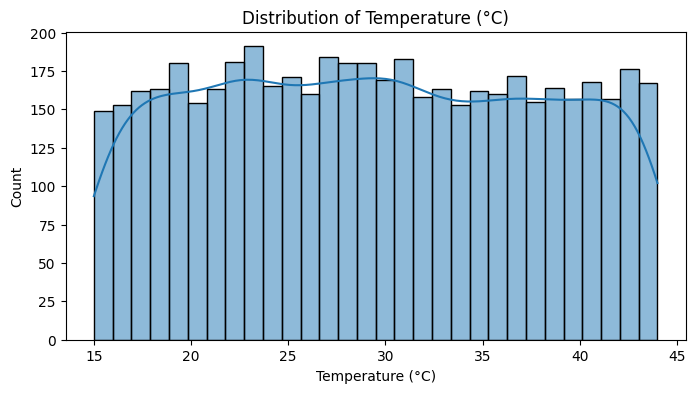

In [24]:
# Distribution of Temperature
plt.figure(figsize=(8, 4))
sns.histplot(df['Temperature (°C)'], kde=True, bins=30)
plt.title("Distribution of Temperature (°C)")
plt.show()


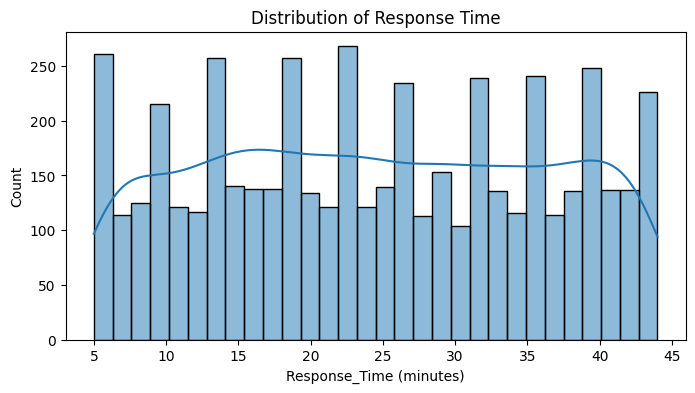

In [25]:
# Distribution of Response Time
plt.figure(figsize=(8, 4))
sns.histplot(df['Response_Time (minutes)'], kde=True, bins=30)
plt.title("Distribution of Response Time")
plt.show()

In [ ]:
# 2. Detecting Outliers (Using Boxplots)

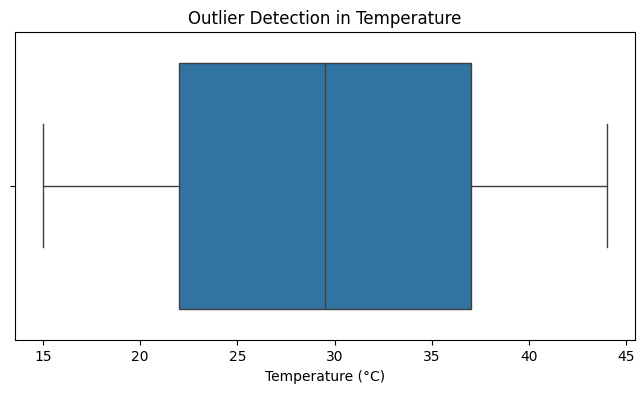

In [26]:
# Boxplot for Temperature
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Temperature (°C)'])
plt.title("Outlier Detection in Temperature")
plt.show()


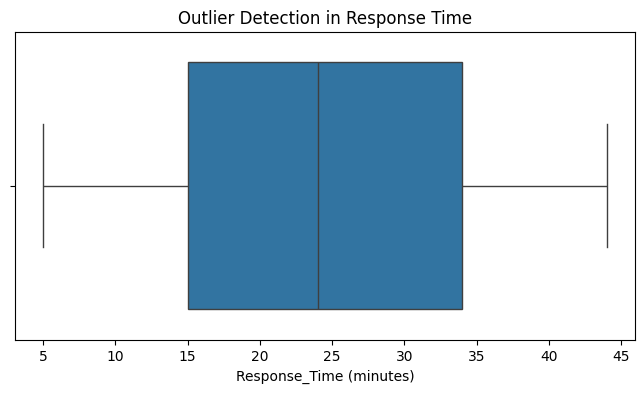

In [27]:
# Boxplot for Response Time
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Response_Time (minutes)'])
plt.title("Outlier Detection in Response Time")
plt.show()

In [ ]:
# 3. Identify Outliers (Numerically using IQR method)

In [28]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Detect outliers in Temperature and Response Time
outliers_temp = detect_outliers_iqr(df, 'Temperature (°C)')
outliers_response = detect_outliers_iqr(df, 'Response_Time (minutes)')

print("Outliers in Temperature (°C):", len(outliers_temp))
print("Outliers in Response Time:", len(outliers_response))


Outliers in Temperature (°C): 0
Outliers in Response Time: 0


In [ ]:
# 4. Correlation Heatmap 

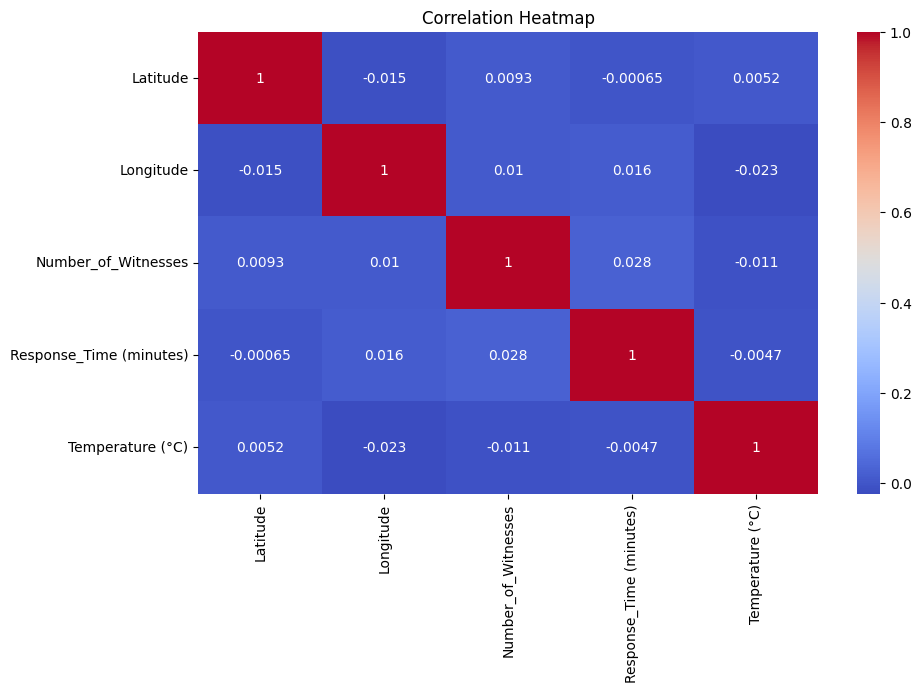

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()